In [1]:
import tensorflow as tf

In [77]:
import pandas as pd
import numpy as np

In [78]:
df1 = pd.read_csv("SA _Tourism.csv")

In [79]:
df1.head()

,text,Class
0,Happy Sunday! â™¥ï¸\nThanks my lovely @maxsev...,Memories with Family/Friends
1,Last day at the Swedish Nationals!\n~ðŸ‡¸ðŸ‡ª~...,Memories with Family/Friends
2,Looking forward to accompany this awesome swed...,Memories with Family/Friends
3,Look closely and you will notice to of the mos...,Memories with Family/Friends
4,See you in one year Ã…rhus ðŸ’•\n.\nHappy to b...,Memories with Family/Friends


In [80]:
df1['Class'].value_counts()

Fascinating Landscapes           2110
Climate                          1139
Memories with Family/Friends     1025
Local People & Culture            962
Local Cuisine                     755
Outdoor Activities and Events     728
History and Heritage              688
Adventure                         553
Luxurious Indulgence              312
Break Away from Routine           265
Name: Class, dtype: int64

In [81]:
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [82]:
df1.shape

(8537, 2)

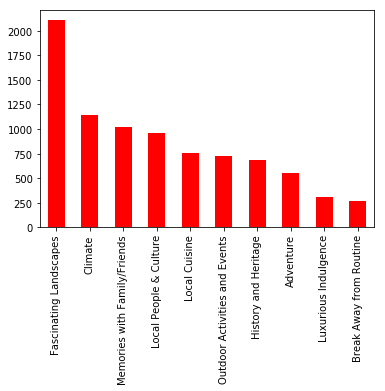

In [83]:
df1['Class'].value_counts().plot(kind='bar', color='red')
plt.show()

In [84]:
df1=df1[pd.notnull(df1['text'])]
df1.reset_index()

,index,text,Class
0,0,Happy Sunday! â™¥ï¸\nThanks my lovely @maxsev...,Memories with Family/Friends
1,1,Last day at the Swedish Nationals!\n~ðŸ‡¸ðŸ‡ª~...,Memories with Family/Friends
2,2,Looking forward to accompany this awesome swed...,Memories with Family/Friends
3,3,Look closely and you will notice to of the mos...,Memories with Family/Friends
4,4,See you in one year Ã…rhus ðŸ’•\n.\nHappy to b...,Memories with Family/Friends
5,5,Hei! Olemme tÃ¤ssÃ¤ kevÃ¤Ã¤n ja kesÃ¤n mittaan...,Memories with Family/Friends
6,6,"One of our US dealers, Janne â€Fritzâ€ Eksta...",Memories with Family/Friends
7,7,"Kenapa banyak ibu-ibu imigran, pengungsi, asin...",Memories with Family/Friends
8,8,"Kenapa banyak ibu-ibu imigran, pengungsi, asin...",Memories with Family/Friends
9,9,Condition check after travelling and training....,Memories with Family/Friends


In [85]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhinav.arun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
df1.shape

(8508, 2)

In [87]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;#]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [88]:
def clean(text):
    #text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text

In [89]:
df1['cl_text']=df1['text'].apply(lambda x : clean(x))

In [90]:
df1['word_count'] = df1['cl_text'].apply(lambda x: len(str(x).split(" ")))
df1['char_count'] = df1['cl_text'].str.len()

In [91]:
df1=df1[pd.notnull(df1['cl_text'])]
df1.head()

,text,Class,cl_text,word_count,char_count
0,Happy Sunday! â™¥ï¸\nThanks my lovely @maxsev...,Memories with Family/Friends,happy sunday thanks lovely maxsevastyanov tiff...,28,259
1,Last day at the Swedish Nationals!\n~ðŸ‡¸ðŸ‡ª~...,Memories with Family/Friends,last day swedish nationalsultimo dia de los su...,39,348
2,Looking forward to accompany this awesome swed...,Memories with Family/Friends,looking forward accompany awesome swedish juni...,63,498
3,Look closely and you will notice to of the mos...,Memories with Family/Friends,look closely notice amazing beautiful girlfrie...,24,196
4,See you in one year Ã…rhus ðŸ’•\n.\nHappy to b...,Memories with Family/Friends,see one year rhus happy begin journey seeing f...,36,255


In [92]:
df1=df1.loc[df1['char_count']!=0]

In [93]:
df1.shape

(8508, 5)

In [94]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df1['avg_word'] = df1['cl_text'].apply(lambda x: avg_word(x))

In [95]:
df1.head()
df1.shape

(8508, 6)

In [96]:
df2=df1
df2.drop('text',axis=1,inplace=True)
df2.drop('word_count',axis=1,inplace=True)
df2.drop('char_count',axis=1,inplace=True)

In [97]:
df2.drop('avg_word',axis=1,inplace=True)

In [98]:
df2.head()

,Class,cl_text
0,Memories with Family/Friends,happy sunday thanks lovely maxsevastyanov tiff...
1,Memories with Family/Friends,last day swedish nationalsultimo dia de los su...
2,Memories with Family/Friends,looking forward accompany awesome swedish juni...
3,Memories with Family/Friends,look closely notice amazing beautiful girlfrie...
4,Memories with Family/Friends,see one year rhus happy begin journey seeing f...


In [99]:
d1={"Fascinating Landscapes":0,"Climate":1,"Memories with Family/Friends":2,"Local People & Culture":3,"Local Cuisine":4,"Outdoor Activities and Events":5,"History and Heritage":6,"Adventure":7,"Luxurious Indulgence":8,"Break Away from Routine":9}

In [100]:
def conv(s):
    return d1[s]

In [101]:
df2['Class1']=df2['Class'].apply(lambda x:conv(x))
df2.drop('Class',axis=1,inplace=True)

In [102]:
df2.head()

,cl_text,Class1
0,happy sunday thanks lovely maxsevastyanov tiff...,2
1,last day swedish nationalsultimo dia de los su...,2
2,looking forward accompany awesome swedish juni...,2
3,look closely notice amazing beautiful girlfrie...,2
4,see one year rhus happy begin journey seeing f...,2


In [42]:
X1=df2.cl_text
Y1=df2.Class1

In [81]:
X1=np.array(X1)
Y1=np.array(Y1)

In [122]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size=0.3, random_state = 1)

In [147]:
max_len = len(max(X1_train, key=len).split())

In [84]:
index = 1
print(X1_train[index])
print(list(d1.keys())[list(d1.values()).index(Y1_train[index])])

fly little wing vintage jimihendrix rock acousticguitar sweden swedish singer singersongwriter songwriter music guy picoftheday fun life fingerpicking shop shopping family pic world follow4follow followme gothenburg tour love stockholm fender family usa guitar legend
Memories with Family/Friends


In [85]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [86]:
Y1_oh_train = convert_to_one_hot(Y1_train, C = 10)
Y1_oh_test = convert_to_one_hot(Y1_test, C = 10)

In [87]:
index = 50
print(Y1_train[index], "is converted into one hot", Y1_oh_train[index])

1 is converted into one hot [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Word Embeddings

In [188]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r',encoding='utf-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            if(len(line[1:]) == 200):
                curr_word = line[0]
                words.add(curr_word)
                word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)           
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [189]:
 word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.twitter.27B.200d.txt')

In [190]:
min([word_to_vec_map[w].shape for w in word_to_vec_map.keys()])

(200,)

In [191]:
def sentence_to_avg(sentence, word_to_vec_map):
    words = [i.lower() for i in sentence.split()]
    avg = np.zeros((200,))
    for w in words:
        if w in word_to_index.keys():
            avg += word_to_vec_map[w]
    avg = avg / len(words)
    return avg

In [192]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [193]:
def predict(X, Y, W, b, word_to_vec_map):
    m = X.shape[0]
    pred = np.zeros((m, 1))
    
    for j in range(m):                       # Loop over training examples
        
        # Split jth test example (sentence) into list of lower case words
        words = X[j].lower().split()
        
        # Average words' vectors
        avg = np.zeros((200,))
        for w in words:
            if w in word_to_vec_map.keys():
                avg += word_to_vec_map[w]
        avg = avg/len(words)

        # Forward propagation
        Z = np.dot(W, avg) + b
        A = softmax(Z)
        pred[j] = np.argmax(A)
        
    print("Accuracy: "  + str(np.mean((pred[:] == Y.reshape(Y.shape[0],1)[:]))))
    
    return pred

In [194]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    np.random.seed(1)
    m = Y.shape[0]
    n_y = 10                                  
    n_h = 200 
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    Y_oh = convert_to_one_hot(Y, C = n_y)
    for t in range(num_iterations):                       # Loop over the number of iterations
        for i in range(m):
            avg = sentence_to_avg(X[i], word_to_vec_map)
            z = np.dot(W, avg) + b
            a = softmax(z)
            cost = -np.sum(np.multiply(Y_oh[i], np.log(a)))
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz
            W = W - learning_rate * dW
            b = b - learning_rate * db
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)
    return pred, W, b

In [140]:
pred, W, b = model(X1_train, Y1_train, word_to_vec_map)
print(pred)

Epoch: 0 --- cost = 0.5291108525032989
Accuracy: 0.4842989084802687
Epoch: 100 --- cost = 0.001884437898672843
Accuracy: 0.764063811922754
Epoch: 200 --- cost = 0.000687561428215902
Accuracy: 0.7766582703610412
Epoch: 300 --- cost = 0.00040129458179224265
Accuracy: 0.781360201511335
[[0.]
 [2.]
 [3.]
 ...
 [2.]
 [6.]
 [2.]]


In [75]:
print("Training set:")
pred_train = predict(X1_train, Y1_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X1_test, Y1_test, W, b, word_to_vec_map)

Training set:


KeyboardInterrupt: 

In [143]:
def plot_confusion_matrix(y_actu, y_pred, title='Confusion matrix', cmap=plt.cm.gray_r):
    
    df_confusion = pd.crosstab(y_actu, y_pred.reshape(y_pred.shape[0],), rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    df_conf_norm = df_confusion / df_confusion.sum(axis=1)
    
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

## Confusion Matrix

Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0   All
Actual                                                           
0          521   23   12   11    7   18   15    9    7    5   628
1           20  269   14    9    8   12    5    5    5    9   356
2            8   13  216   17    7    9    1    5    5    3   284
3           20   19   27  160   11   14   14    4    0    8   277
4            7    6   11   12  185    5    1    3    4    2   236
5           13   14   19   14    3  127    4   11    5    0   210
6           21    7   12   10    1    8  151    6    4    0   220
7           13    5    6    2    5    6    3  126    1    3   170
8            6    4    6    6    7    6    1    2   45    2    85
9            7    8   10    8    3    7    0    2    1   41    87
All        636  368  333  249  237  212  195  173   77   73  2553


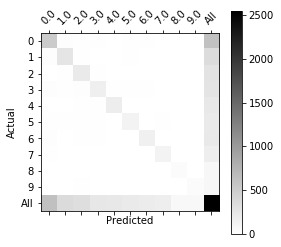

In [144]:
print(pd.crosstab(Y1_test, pred_test.reshape(2553,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y1_test, pred_test)

## Deep Learning

In [195]:
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

In [196]:
def sentences_to_indices(X, word_to_index, max_len):
    m = X.shape[0]                                   # number of training examples
    # Initialize X_indices as a numpy matrix of zeros and the correct shape (≈ 1 line)
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):                               # loop over training examples
        
        # Convert the ith training sentence in lower case and split is into words. You should get a list of words.
        sentence_words = [w.lower() for w in X[i].split()]
        
        # Initialize j to 0
        j = 0
        
        # Loop over the words of sentence_words
        for w in sentence_words:
            if w in word_to_index.keys():
            # Set the (i,j)th entry of X_indices to the index of the correct word.
                X_indices[i, j] = word_to_index[w]
            # Increment j to j + 1
            j += 1
    return X_indices

In [197]:
X1 = np.array(["i love african safari", "lets enjoy africa"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 4)
print("X1 =", X1)
print("X1_indices =", X1_indices)

X1 = ['i love african safari' 'lets enjoy africa']
X1_indices = [[266800. 348020.  11891. 531543.]
 [339236. 184304.  11885.      0.]]


In [107]:
X1=df2.cl_text
Y1=df2.Class1

In [108]:
X1=np.array(X1)
Y1=np.array(Y1)

In [109]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size=0.3, random_state = 1)

In [110]:
max_len = len(max(X1_train, key=len).split())

In [111]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    
    vocab_len = len(word_to_index) + 1           # adding 1 to fit Keras embedding (requirement)
    emb_dim = 200     # define dimensionality of your GloVe word vectors (= 50)
    
    # Initialize the embedding matrix as a numpy array of zeros of shape (vocab_len, dimensions of word vectors = emb_dim)
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    # Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    # Define Keras embedding layer with the correct output/input sizes, make it trainable. Use Embedding(...). Make sure to set trainable=False. 
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)

    # Build the embedding layer, it is required before setting the weights of the embedding layer. Do not modify the "None".
    embedding_layer.build((None,))
    
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [199]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)

weights[0][1][2] = -0.0037743


In [112]:
embedding_layer.get_weights()[0][1][3]

-0.31723

In [145]:
def LSTM_fun(input_shape, word_to_vec_map, word_to_index,embedding_layer):
    """
    Function creating the Emojify-v2 model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (max_len,)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    model -- a model instance in Keras
    """
    
    ### START CODE HERE ###
    # Define sentence_indices as the input of the graph, it should be of shape input_shape and dtype 'int32' (as it contains indices).
    sentence_indices = Input(input_shape, dtype='int32')
    
    # Create the embedding layer pretrained with GloVe Vectors (≈1 line)
#     embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    # Propagate sentence_indices through your embedding layer, you get back the embeddings
    embeddings = embedding_layer(sentence_indices)   
    
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # Be careful, the returned output should be a batch of sequences.
    X = LSTM(128, return_sequences=True)(embeddings)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5)(X)
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # Be careful, the returned output should be a single hidden state, not a batch of sequences.
    X = LSTM(128, return_sequences=False)(X)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5)(X)
    # Propagate X through a Dense layer with softmax activation to get back a batch of 10-dimensional vectors.
    X = Dense(10)(X)
    # Add a softmax activation
    X = Activation('softmax')(X)
    
    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs=sentence_indices, outputs=X)
    
    ### END CODE HERE ###
    
    return model

In [146]:
max_len

491

In [147]:
model = LSTM_fun((max_len,), word_to_vec_map, word_to_index,embedding_layer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 491)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 491, 200)          238702800 
_________________________________________________________________
lstm_13 (LSTM)               (None, 491, 128)          168448    
_________________________________________________________________
dropout_9 (Dropout)          (None, 491, 128)          0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
__________

In [148]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [149]:
X_train_indices = sentences_to_indices(X1_train, word_to_index, max_len)
Y1_train_oh = convert_to_one_hot(Y1_train, C = 10)

In [150]:
model.fit(X_train_indices, Y1_train_oh, epochs = 20, batch_size = 64, shuffle=True)

Epoch 1/20
5955/5955 [==============================] - 634s 106ms/step - loss: 2.1793 - acc: 0.2485
Epoch 2/20
5955/5955 [==============================] - 635s 107ms/step - loss: 2.1592 - acc: 0.2484
Epoch 3/20
5955/5955 [==============================] - 1281s 215ms/step - loss: 2.1562 - acc: 0.2485
Epoch 4/20
5955/5955 [==============================] - 641s 108ms/step - loss: 2.1545 - acc: 0.2484
Epoch 5/20
5955/5955 [==============================] - 649s 109ms/step - loss: 2.1533 - acc: 0.2485
Epoch 6/20
5955/5955 [==============================] - 651s 109ms/step - loss: 2.1522 - acc: 0.2485
Epoch 7/20
5955/5955 [==============================] - 650s 109ms/step - loss: 2.1540 - acc: 0.2485
Epoch 8/20
5955/5955 [==============================] - 652s 109ms/step - loss: 2.1533 - acc: 0.2485
Epoch 9/20
5955/5955 [==============================] - 648s 109ms/step - loss: 2.1516 - acc: 0.2485
Epoch 10/20
5955/5955 [==============================] - 649s 109ms/step - loss: 2.1527 - 

In [144]:
X_test_indices = sentences_to_indices(X1_test, word_to_index, max_len = max_len)
Y_test_oh = convert_to_one_hot(Y1_test, C = 10)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

2553/2553 [==============================] - 12s 5ms/step

Test accuracy =  0.24598511569041437
